# Image Classification Using CNN

CAT OR DOG ?

In [55]:
import numpy as np
import pandas as   pd 
import os
import glob as gb  
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras


# Open Folders

now let's first check the Train folder to have a look to its conten

In [120]:
train_images='PetImages/train/'
test_images='PetImages/test/'
pre_imaages='PetImages/pre/'

In [3]:
for folder in  os.listdir(train_images) : 
    files = gb.glob(pathname= str( train_images + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 6061 in folder cat
For training data , found 6586 in folder dog


In [4]:
for folder in os.listdir(test_images):
    files=gb.glob(pathname=str(test_images+folder+'/*.jpg'))
    print(f'For testing data ,found{len(files)}in folder {folder}')

For testing data ,found4578in folder cat
For testing data ,found3912in folder dog


In [5]:
file=gb.glob(pathname=str(pre_imaages+'/*.jpg'))
print(f'For the images that we want to predicte  ,found {len(files)}')

For the images that we want to predicte  ,found 3912


# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 2 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back


In [121]:
code = {'cat':0 ,'dog':1} 
def coder(n):
    for x,y in code.items():
        if n==y:
            return x 

In [7]:
size=[]
for folder in os.listdir(train_images):
    files = gb.glob(pathname=str(train_images+folder+'/*.jpg'))
    for file in files:
        image=plt.imread(file )
        size.append(image.shape)
pd.Series(size).value_counts()

(375, 500, 3)    2982
(500, 375, 3)     232
(333, 500, 3)     222
(240, 320, 3)     217
(374, 500, 3)      89
                 ... 
(301, 460, 3)       1
(350, 480, 3)       1
(329, 378, 3)       1
(211, 300, 3)       1
(300, 386, 3)       1
Length: 4419, dtype: int64

In [8]:
size = []
for folder  in os.listdir(test_images):
    files=gb.glob(pathname=str(test_images+folder+'/*.jpg'))
    for file in files:
        image=plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

C:\Users\VT\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


(375, 500, 3)    1980
(500, 375, 3)     178
(333, 500, 3)     141
(240, 320, 3)     111
(374, 500, 3)      67
                 ... 
(432, 432, 3)       1
(310, 410, 3)       1
(102, 100, 3)       1
(346, 351, 3)       1
(150, 97, 3)        1
Length: 3215, dtype: int64

In [9]:
size=[]
files=gb.glob(pathname=str(pre_imaages+'/*.jpg'))
for file in files:
    image = plt.imread(file)
    size.append(image.shape)

    
pd.Series(size).value_counts()

(375, 500, 3)    905
(500, 375, 3)     78
(240, 320, 3)     71
(333, 500, 3)     64
(332, 500, 3)     36
                ... 
(322, 285, 3)      1
(270, 331, 3)      1
(118, 185, 3)      1
(180, 280, 4)      1
(181, 250, 3)      1
Length: 1726, dtype: int64

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training


In [167]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(train_images) : 
    files = gb.glob(pathname= train_images+folder+ '/*.jpg')
    for file in files:
        image = cv2.imread(file)
        try:
            image_array = cv2.resize(image , (s,s))
        except :
            continue
        X_train.append(list(image_array))
        y_train.append(code[folder])

        


In [132]:
print(f'we have {len(X_train)} items in X_train') 

we have 249 items in X_train


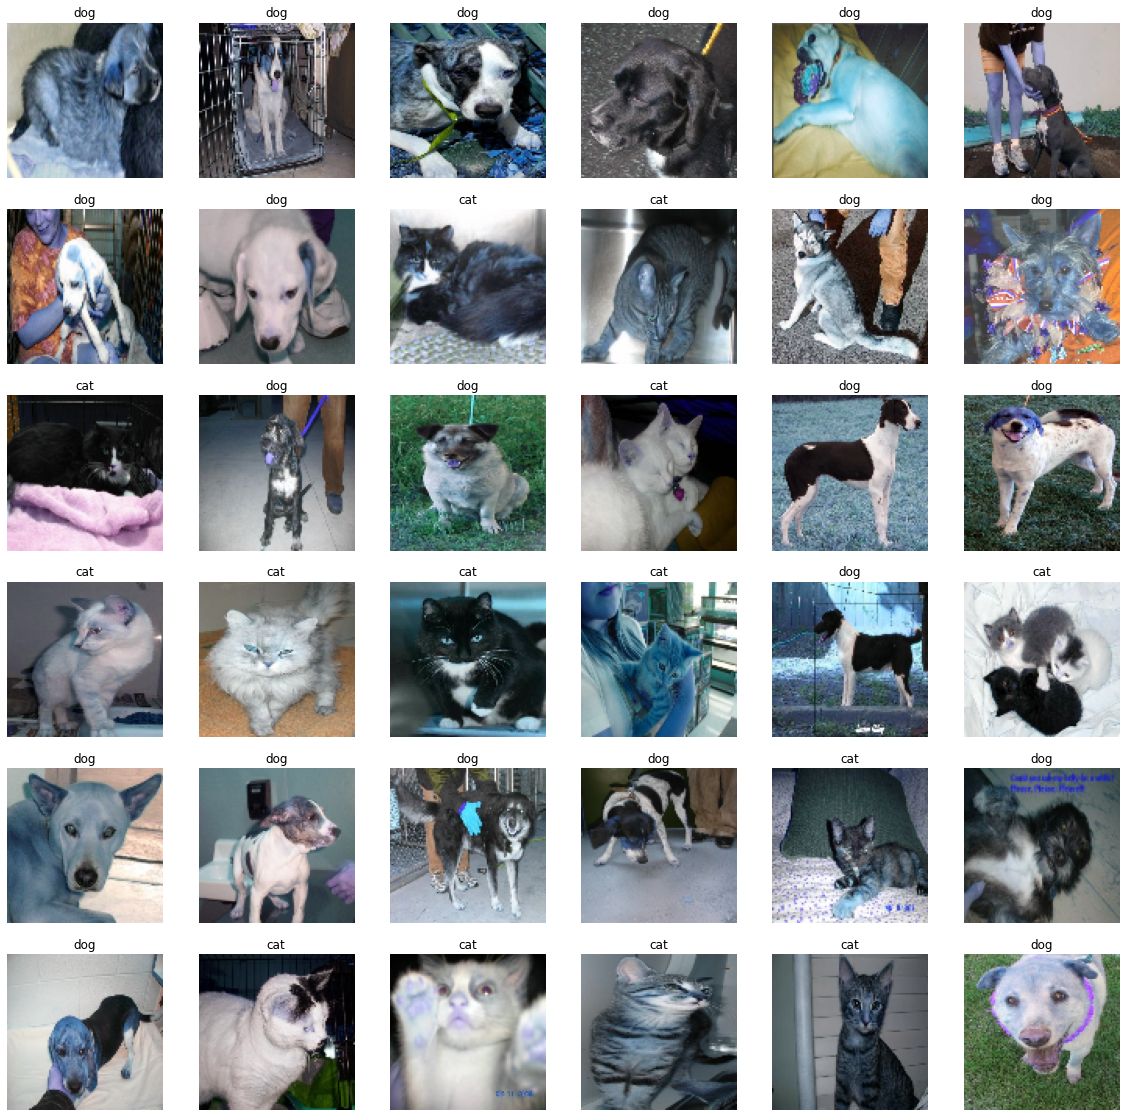

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(coder(y_train[i]))

In [13]:
x_test=[]
y_test=[]
for folder in os.listdir(test_images):
    files=gb.glob(pathname=str(test_images+folder+'/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        try:
            image_array=cv2.resize(image,(s,s))
        except:
            continue
        x_test.append(list(image_array))
        y_test.append(code[folder])

In [14]:
print(f'we have {len(x_test)} items in x_test') 

we have 8472 items in x_test


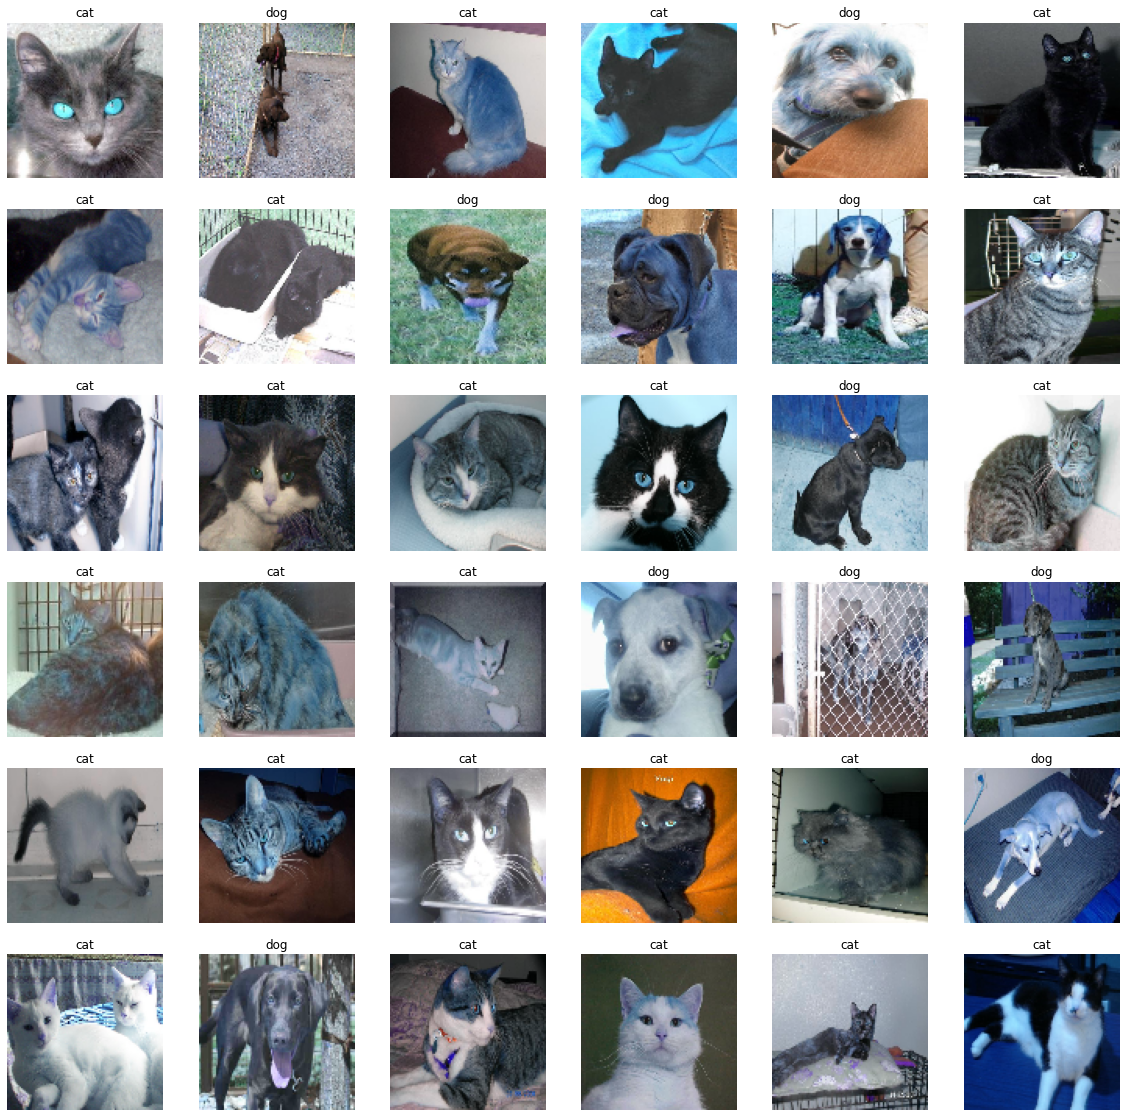

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])   
    plt.axis('off')
    plt.title(coder(y_test[i]))

In [79]:
x_pre=[]
files=gb.glob(pathname=str(pre_imaages+'/*.jpg'))
for files in files:
    image = cv2.imread(file)
    try:
        image_array=cv2.resize(image,(s,s))
    except:
        continue
    x_pre.append(list(image_array))

In [80]:
print(f'we have {len(x_pre)} items in x_predict') 

we have 1863 items in x_predict


#  Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [81]:
X_train = np.array(X_train)
x_test = np.array(x_test)
x_pre_array = np.array(x_pre)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'X_pred shape  is {x_pre_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (12620, 100, 100, 3)
X_test shape  is (8472, 100, 100, 3)
X_pred shape  is (1863, 100, 100, 3)
y_train shape  is (12620,)
y_test shape  is (8472,)


now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [28]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(2,2),      
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,    
        keras.layers.Dense(64,activation='relu') ,   
        keras.layers.Dense(32,activation='relu'),           
        keras.layers.Dense(16,activation='relu'),
        keras.layers.Dense(2,activation='sigmoid') ,    
        ])

In [29]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (Non

In [31]:
epochs = 20
ThisModel = KerasModel.fit(X_train, y_train,batch_size=64, epochs=epochs,verbose=1)

Epoch 1/20
198/198 [==============================] - 309s 2s/step - loss: 2.2014 - accuracy: 0.5336
Epoch 2/20
198/198 [==============================] - 305s 2s/step - loss: 0.6851 - accuracy: 0.5536
Epoch 3/20
198/198 [==============================] - 377s 2s/step - loss: 0.6749 - accuracy: 0.5727
Epoch 4/20
198/198 [==============================] - 396s 2s/step - loss: 0.6562 - accuracy: 0.5983
Epoch 5/20
198/198 [==============================] - 421s 2s/step - loss: 0.6291 - accuracy: 0.6329
Epoch 6/20
198/198 [==============================] - 381s 2s/step - loss: 0.5911 - accuracy: 0.6654
Epoch 7/20
198/198 [==============================] - 337s 2s/step - loss: 0.5438 - accuracy: 0.6995
Epoch 8/20
198/198 [==============================] - 378s 2s/step - loss: 0.4833 - accuracy: 0.7455
Epoch 9/20
198/198 [==============================] - 318s 2s/step - loss: 0.4178 - accuracy: 0.7835
Epoch 10/20
198/198 [==============================] - 319s 2s/step - loss: 0.3633 - accura

how is the final loss & accuracy


In [33]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

265/265 [==============================] - 58s 200ms/step - loss: 2.6112 - accuracy: 0.5791
Test Loss is 2.6112120151519775
Test Accuracy is 0.579084038734436


In [51]:
y_predd = KerasModel.predict(x_test)

print('Prediction Shape is {}'.format(y_predd.shape))

265/265 [==============================] - 57s 217ms/step
Prediction Shape is (8472, 2)


great

now it's time to redict X Predict

In [82]:
y_result = KerasModel.predict(x_pre_array)

print('Prediction Shape is {}'.format(y_result.shape))

59/59 [==============================] - 12s 207ms/step
Prediction Shape is (1863, 2)


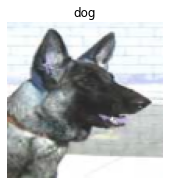

In [86]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pre_array),1))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pre[i])    
    plt.axis('off')
    plt.title(coder(np.argmax(y_result[i])))

# Let's Load our first pre trained model : ResNet50

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = ResNet50(weights='imagenet')

img_path = 'PetImages/pre/1998.jpg'
img = image.load_img(img_path, target_size=(224, 224))
array_image = image.img_to_array(img)
x = np.expand_dims(array_image, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 3s 3s/step
Predicted: [('n02085620', 'Chihuahua', 0.95557994), ('n02093256', 'Staffordshire_bullterrier', 0.010055092), ('n02093428', 'American_Staffordshire_terrier', 0.007667785)]


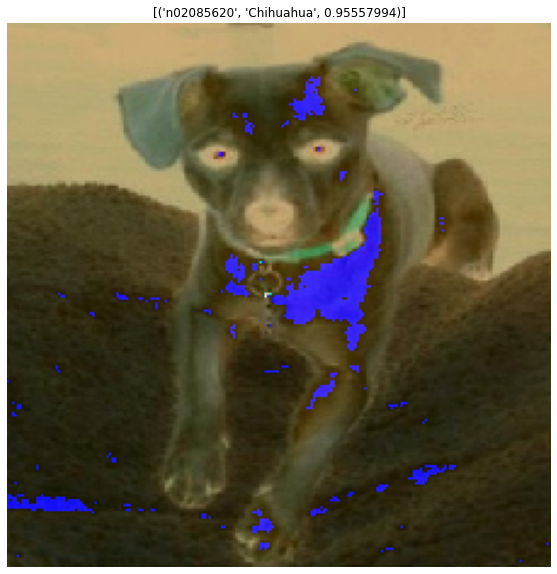

In [78]:
plt.figure(figsize=(10,10))
plt.imshow((array_image * 255).astype(np.uint8))
plt.axis('off')
plt.title( decode_predictions(preds, top=1)[0])
plt.show()

# VGG16

In [93]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = 'PetImages/pre/10668.jpg'
img = image.load_img(img_path, target_size=(224, 224))
image_array= image.img_to_array(img)
x = np.expand_dims(image_array, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 11s 11s/step


In [87]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [94]:
features.shape


(1, 1000)

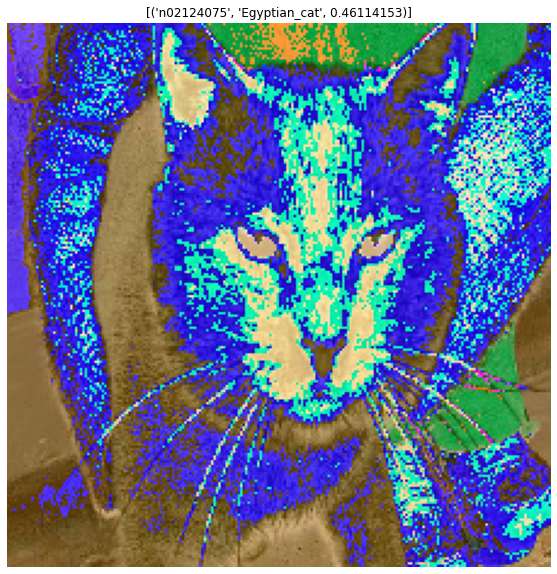

In [103]:
plt.figure(figsize=(10,10))
plt.imshow((image_array
            * 255).astype(np.uint8
                         ))
plt.axis('off')
plt.title( decode_predictions(features, top=1)[0])
plt.show()

# VGG19

In [116]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet', include_top=True,classifier_activation="softmax",classes=1000)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'PetImages/pre/11136.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)


1/1 [==============================] - 5s 5s/step


In [117]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [118]:
block4_pool_features.shape

(1, 14, 14, 512)

In [119]:
block4_pool_features


array([[[[0.0000000e+00, 4.9792194e+02, 2.3668425e+02, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 3.8625876e+02, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.7194080e+02, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [4.8555057e+02, 0.0000000e+00, 1.6747452e+02, ...,
          9.4868414e+02, 0.0000000e+00, 0.0000000e+00],
         [5.7891614e+02, 0.0000000e+00, 2.5171437e+00, ...,
          1.0391246e+03, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.8992899e+02, 2.3169670e+02, ...,
          0.0000000e+00, 2.9149039e+02, 0.0000000e+00]],

        [[0.0000000e+00, 2.7389883e+02, 0.0000000e+00, ...,
          5.0028725e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.6003023e+02, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 5.5138273e+00],
         [0.0000000e+00, 5.4130749e+01, 0.0000000e+00, .

In [161]:
X_train.shape

(12620, 224, 224, 3)

In [162]:
y_train.shape


(12620,)